In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas
import scipy.special
from pandas.tools.plotting import autocorrelation_plot
import itertools
import time
import sys
from datetime import datetime

def tri_data(numbers):
    tri_data = np.zeros(numbers, dtype=np.int8)
    tri_data[np.arange(5)] = np.random.choice(np.arange(1,4), 5)
    #tri_data[np.arange(3)] = [1, 2, 3]
    for n in np.arange(5, numbers):
        if tri_data[n-3] == 1:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.99, 0.005, 0.005))
        if tri_data[n-3] == 2:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.005, 0.99, 0.005))
        if tri_data[n-3] == 3:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.005, 0.005, 0.99))
    return(tri_data)
data_all = tri_data(700)
data = data_all[np.arange(200)]
data_all
#data

array([3, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3,
       1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2,
       3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 3,
       2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3,
       2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [185]:
data_all

array([2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1,
       2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3,
       3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3, 2, 1, 3, 3, 3, 1, 2,
       2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 3,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 3, 2, 2, 3,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       3, 2,

In [5]:
def tri_data(numbers):
    tri_data = np.zeros(numbers, dtype=np.int8)
    tri_data[np.arange(5)] = np.random.choice(np.arange(1,4), 5)
    #tri_data[np.arange(3)] = [1, 2, 3]
    for n in np.arange(5, numbers):
        if tri_data[n-3] == 1 and tri_data[n-1] == 1:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.9, 0.05, 0.05))
        elif tri_data[n-3] == 2 and tri_data[n-1] == 2:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.05, 0.9, 0.05))
        elif tri_data[n-3] == 3 and tri_data[n-1] == 3:
            tri_data[n] = np.random.choice(np.arange(1,4), p = (0.05, 0.05, 0.9))
        else: tri_data[n] = np.random.choice(np.arange(1,4))
  
    return(tri_data)
data_all = tri_data(700)
data = data_all[np.arange(200)]
data_all

array([3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2, 2, 3, 3, 2, 3, 3, 1, 1, 2, 1, 1, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 1, 3,
       2, 3, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 3, 3,
       2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 1,
       1, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 1, 2,
       2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 2, 2, 3, 1, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 1, 1, 1, 1,
       1, 1,

In [181]:
#start_time = datetime.now()
S = 20000
burnin = S*0.8
L = 100
alpha0 = 1

# generate z1t, z2t, z3t... according to the corresponding k1, k2, k3, ...
k1 = np.zeros(S)
k2 = np.zeros(S)
k3 = np.zeros(S)
k4 = np.zeros(S)
k5 = np.zeros(S)
k1[0] = 2
k2[0] = 2
k3[0] = 2
k4[0] = 2
k5[0] = 2
z_j_t = np.zeros((5, len(data), S))
z_j_t[:,:,0] = 1
C0 = 3
alpha = 1/C0
q = 5
eta = 0.5
gamma1 = gamma2 = gamma3 = gamma4 = gamma5 = 1/C0

#step 1
#define pi_ast_l
pi_ast_l = np.zeros(L)
V_l = np.random.beta(1, alpha0, L)
pi_ast_l[0] = V_l[0]
oneminusV_l = 1 - V_l 
for n in np.arange(1, L):
    pi_ast_l[n] = V_l[n]*np.prod(oneminusV_l[:n])   
    
lambda_ast_l = np.random.dirichlet(np.repeat(1/C0, C0), L)

def nh1h2h3h4h5y(h1, h2, h3, h4, h5, y):
    case1 = (z_j_t[0, q:, 0] == h1)*1
    case2 = (z_j_t[1, q:, 0] == h2)*1 
    case3 = (z_j_t[2, q:, 0] == h3)*1
    case4 = (z_j_t[3, q:, 0] == h4)*1
    case5 = (z_j_t[4, q:, 0] == h5)*1
    case12345 = case1*case2*case3*case4*case5
    casey = (data[q:] == y)*1
    nh1h2h3h4h5y = np.sum(case12345*casey)
    return(nh1h2h3h4h5y)

#simulating l, PLN()[l-1] means the prob of l with h1, h2, h3
def PLN(h1, h2, h3, h4, h5):
    lamny = [(lambda_ast_l[:, y-1]**nh1h2h3h4h5y(h1, h2, h3, h4, h5, y)) for y in range(1, C0+1)]
    PLNnotnorm = pi_ast_l*np.prod(lamny, axis = 0)
    PLN = PLNnotnorm/np.sum(PLNnotnorm)
    return PLN

def sample_z_ast(h1, h2, h3, h4, h5):
    z = np.random.choice(np.arange(1, L+1), p = PLN(h1, h2, h3, h4, h5))
    return z
h1 = np.arange(1, k1[0]+1)
h2 = np.arange(1, k2[0]+1)
h3 = np.arange(1, k3[0]+1)
h4 = np.arange(1, k4[0]+1)
h5 = np.arange(1, k5[0]+1)
per = list(itertools.product(h1, h2, h3, h4, h5)) #permutations
zz = list(map(lambda x: sample_z_ast(*x), per))
z_ast_h1h2h3h4h5 = np.reshape(zz, (k1[0],k2[0],k3[0],k4[0],k5[0]))

#step 2
def sample_V_l(l): 
    return np.random.beta(1 + np.count_nonzero(z_ast_h1h2h3h4h5 == l), alpha0 + np.count_nonzero(z_ast_h1h2h3h4h5 > l), 1).tolist()
V_l = np.concatenate(list(map(lambda x: sample_V_l(x), range(1, L+1))))
pi_ast_l[0] = V_l[0]
oneminusV_l = 1 - V_l 
for n in np.arange(1, L):
    pi_ast_l[n] = V_l[n]*np.prod(oneminusV_l[:n])

#step 3
def n_ast_l_y(l, y):
    def nnn(h1, h2, h3, h4, h5):
        nnn = np.count_nonzero(z_ast_h1h2h3h4h5[h1-1, h2-1, h3-1, h4-1, h5-1] == l)*nh1h2h3h4h5y(h1, h2, h3, h4, h5, y)
        return nnn
    h1 = np.arange(1, k1[0]+1)
    h2 = np.arange(1, k2[0]+1)
    h3 = np.arange(1, k3[0]+1)
    h4 = np.arange(1, k4[0]+1)
    h5 = np.arange(1, k5[0]+1)
    per = list(itertools.product(h1, h2, h3, h4, h5))
    nn = list(map(lambda x: nnn(*x), per))
    #return per
    n_ast_l_y = np.sum(nn)
    return(n_ast_l_y)

#lambda_ast_l[l-1, y-1] means the value of (l,y)
def nrd(l):
    nrd = np.random.dirichlet([1/C0 + n_ast_l_y(l, y) for y in np.arange(1, C0+1)])
    return nrd
lambda_ast_l = np.array(list(map(lambda x: nrd(x), np.arange(1, L+1))))


#step 4
def n_j_wj_hj(j, wj, hj):
    case1 = (z_j_t[j-1, np.arange(q, len(data)),0] == hj)*1
    case2 = (data[np.arange(q, len(data))-j] == wj)*1
    n_j_wj_hj = np.sum(case1*case2)
    return(n_j_wj_hj)


pi_1_w1 = np.zeros((C0, k1[0]))
for c in np.arange(C0):
        pi_1_w1[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(1, c+1, h1) for h1 in np.arange(1, k1[0]+1)])
        
pi_2_w2 = np.zeros((C0, k2[0]))
for c in np.arange(C0):
        pi_2_w2[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(2, c+1, h2) for h2 in np.arange(1, k2[0]+1)])
        
pi_3_w3 = np.zeros((C0, k3[0]))
for c in np.arange(C0):
        pi_3_w3[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(3, c+1, h3) for h3 in np.arange(1, k3[0]+1)])

pi_4_w4 = np.zeros((C0, k4[0]))
for c in np.arange(C0):
        pi_4_w4[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(4, c+1, h4) for h4 in np.arange(1, k4[0]+1)])
        
pi_5_w5 = np.zeros((C0, k5[0]))
for c in np.arange(C0):
        pi_5_w5[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(5, c+1, h5) for h5 in np.arange(1, k5[0]+1)])

        
        
        
##prob density of y_pred
rec_pred_y_den = np.zeros((C0, C0, C0, C0, C0, C0, S-burnin-1))



#step 5
t = np.arange(q, len(data))

PWLZY_1 = np.zeros((k1[0], len(data)))
for h in np.arange(k1[0]):
    PWLZY_1[h,t] = pi_1_w1[data[t-1]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[h, np.array(z_j_t[1,t,0], dtype = np.int8)-1, 
                   np.array(z_j_t[2,t,0], dtype = np.int8)-1, np.array(z_j_t[3,t,0], dtype = np.int8)-1, np.array(z_j_t[4,t,0], dtype = np.int8)-1]-1, data[t]-1]
PWLZY_1[:,t] = PWLZY_1[:,t]/np.sum(PWLZY_1[:,t], axis = 0)
        
PWLZY_2 = np.zeros((k2[0], len(data)))
for h in np.arange(k2[0]):
    PWLZY_2[h,t] = pi_2_w2[data[t-2]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,0], dtype = np.int8)-1, h, 
                   np.array(z_j_t[2,t,0], dtype = np.int8)-1, np.array(z_j_t[3,t,0], dtype = np.int8)-1, np.array(z_j_t[4,t,0], dtype = np.int8)-1]-1, data[t]-1]
PWLZY_2[:,t] = PWLZY_2[:,t]/np.sum(PWLZY_2[:,t], axis = 0)
        
PWLZY_3 = np.zeros((k3[0], len(data)))
for h in np.arange(k3[0]):
    PWLZY_3[h,t] = pi_3_w3[data[t-3]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,0], dtype = np.int8)-1, 
                   np.array(z_j_t[1,t,0], dtype = np.int8)-1, h, np.array(z_j_t[3,t,0], dtype = np.int8)-1, np.array(z_j_t[4,t,0], dtype = np.int8)-1]-1, data[t]-1]
PWLZY_3[:,t] = PWLZY_3[:,t]/np.sum(PWLZY_3[:,t], axis = 0)

PWLZY_4 = np.zeros((k4[0], len(data)))
for h in np.arange(k4[0]):
    PWLZY_4[h,t] = pi_4_w4[data[t-4]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,0], dtype = np.int8)-1, 
                   np.array(z_j_t[1,t,0], dtype = np.int8)-1, np.array(z_j_t[2,t,0], dtype = np.int8)-1, h, np.array(z_j_t[4,t,0], dtype = np.int8)-1]-1, data[t]-1]
PWLZY_4[:,t] = PWLZY_4[:,t]/np.sum(PWLZY_4[:,t], axis = 0)

PWLZY_5 = np.zeros((k5[0], len(data)))
for h in np.arange(k5[0]):
    PWLZY_5[h,t] = pi_5_w5[data[t-5]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,0], dtype = np.int8)-1, 
                   np.array(z_j_t[1,t,0], dtype = np.int8)-1, np.array(z_j_t[2,t,0], dtype = np.int8)-1, np.array(z_j_t[3,t,0], dtype = np.int8)-1, h]-1, data[t]-1]
PWLZY_5[:,t] = PWLZY_5[:,t]/np.sum(PWLZY_5[:,t], axis = 0)

pp1 = PWLZY_1[:,np.arange(q, len(data))].transpose()
c1 = pp1.cumsum(axis=1)
u1 = np.random.rand(len(c1), 1)
z_j_t[0,q:,1] = (u1 < c1).argmax(axis=1)+1

pp2 = PWLZY_2[:,np.arange(q, len(data))].transpose()
c2 = pp2.cumsum(axis=1)
u2 = np.random.rand(len(c2), 1)
z_j_t[1,q:,1] = (u2 < c2).argmax(axis=1)+1

pp3 = PWLZY_3[:,np.arange(q, len(data))].transpose()
c3 = pp3.cumsum(axis=1)
u3 = np.random.rand(len(c3), 1)
z_j_t[2,q:,1] = (u3 < c3).argmax(axis=1)+1

pp4 = PWLZY_4[:,np.arange(q, len(data))].transpose()
c4 = pp4.cumsum(axis=1)
u4 = np.random.rand(len(c4), 1)
z_j_t[3,q:,1] = (u4 < c4).argmax(axis=1)+1

pp5 = PWLZY_5[:,np.arange(q, len(data))].transpose()
c5 = pp5.cumsum(axis=1)
u5 = np.random.rand(len(c5), 1)
z_j_t[4,q:,1] = (u5 < c5).argmax(axis=1)+1

#step 6
log_p_k1 = np.zeros(C0)
for i in np.arange(max(z_j_t[0, :, 1])-1, C0):
    log_p_k1[i] = -eta*1*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma1) - scipy.special.gammaln((i+1)*gamma1 + 
              list(data[(q-1):(len(data)-1)]).count(r)) for r in np.arange(1, C0+1)])
log_p_k1_new = log_p_k1[log_p_k1 != 0] - np.max(log_p_k1[log_p_k1 != 0])
act_p_k1 = np.exp(log_p_k1_new)
act_p1 = act_p_k1/np.sum(act_p_k1)
p1 = np.append(np.zeros(max(z_j_t[0, :, 1])-1), act_p1)
k1[1] = np.random.choice(np.arange(1, C0+1), p = p1)

log_p_k2 = np.zeros(C0)
for i in np.arange(max(z_j_t[1, :, 1])-1, C0):
    log_p_k2[i] = -eta*2*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma2) - scipy.special.gammaln((i+1)*gamma2 + 
              list(data[(q-2):(len(data)-2)]).count(r)) for r in np.arange(1, C0+1)])
log_p_k2_new = log_p_k2[log_p_k2 != 0] - np.max(log_p_k2[log_p_k2 != 0])
act_p_k2 = np.exp(log_p_k2_new)
act_p2 = act_p_k2/np.sum(act_p_k2)
p2 = np.append(np.zeros(max(z_j_t[1, :, 1])-1), act_p2)
k2[1] = np.random.choice(np.arange(1, C0+1), p = p2)

log_p_k3 = np.zeros(C0)
for i in np.arange(max(z_j_t[2, :, 1])-1, C0):
    log_p_k3[i] = -eta*3*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma3) - scipy.special.gammaln((i+1)*gamma3 + 
              list(data[(q-3):(len(data)-3)]).count(r)) for r in np.arange(1, C0+1)])
log_p_k3_new = log_p_k3[log_p_k3 != 0] - np.max(log_p_k3[log_p_k3 != 0])
act_p_k3 = np.exp(log_p_k3_new)
act_p3 = act_p_k3/np.sum(act_p_k3)
p3 = np.append(np.zeros(max(z_j_t[2, :, 1])-1), act_p3)
k3[1] = np.random.choice(range(1, C0+1), p = p3)

log_p_k4 = np.zeros(C0)
for i in np.arange(max(z_j_t[3, :, 1])-1, C0):
    log_p_k4[i] = -eta*4*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma4) - scipy.special.gammaln((i+1)*gamma4 + 
              list(data[(q-4):(len(data)-4)]).count(r)) for r in np.arange(1, C0+1)])
log_p_k4_new = log_p_k4[log_p_k4 != 0] - np.max(log_p_k4[log_p_k4 != 0])
act_p_k4 = np.exp(log_p_k4_new)
act_p4 = act_p_k4/np.sum(act_p_k4)
p4 = np.append(np.zeros(max(z_j_t[3, :, 1])-1), act_p4)
k4[1] = np.random.choice(range(1, C0+1), p = p4)

log_p_k5 = np.zeros(C0)
for i in np.arange(max(z_j_t[4, :, 1])-1, C0):
    log_p_k5[i] = -eta*5*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma5) - scipy.special.gammaln((i+1)*gamma5 + 
              list(data[(q-5):(len(data)-5)]).count(r)) for r in np.arange(1, C0+1)])
log_p_k5_new = log_p_k5[log_p_k5 != 0] - np.max(log_p_k5[log_p_k5 != 0])
act_p_k5 = np.exp(log_p_k5_new)
act_p5 = act_p_k5/np.sum(act_p_k5)
p5 = np.append(np.zeros(max(z_j_t[4, :, 1])-1), act_p5)
k5[1] = np.random.choice(range(1, C0+1), p = p5)




start_time = datetime.now()
for s in np.arange(1, S-1):
#step 1
    def nh1h2h3h4h5y(h1, h2, h3, h4, h5, y):
        case1 = (z_j_t[0, q:, s] == h1)*1
        case2 = (z_j_t[1, q:, s] == h2)*1 
        case3 = (z_j_t[2, q:, s] == h3)*1
        case4 = (z_j_t[3, q:, s] == h4)*1
        case5 = (z_j_t[4, q:, s] == h5)*1
        case12345 = case1*case2*case3*case4*case5
        casey = (data[q:] == y)*1
        nh1h2h3h4h5y = np.sum(case12345*casey)
        return(nh1h2h3h4h5y)

#simulating l, PLN()[l-1] means the prob of l with h1, h2, h3
    def PLN(h1, h2, h3, h4, h5):
        lamny = [(lambda_ast_l[:, y-1]**nh1h2h3h4h5y(h1, h2, h3, h4, h5, y)) for y in range(1, C0+1)]
        PLNnotnorm = pi_ast_l*np.prod(lamny, axis = 0)
        PLN = PLNnotnorm/np.sum(PLNnotnorm)
        return PLN

    def sample_z_ast(h1, h2, h3, h4, h5):
        z = np.random.choice(np.arange(1, L+1), p = PLN(h1, h2, h3, h4, h5))
        return z
    h1 = np.arange(1, k1[s]+1)
    h2 = np.arange(1, k2[s]+1)
    h3 = np.arange(1, k3[s]+1)
    h4 = np.arange(1, k4[s]+1)
    h5 = np.arange(1, k5[s]+1)
    per = list(itertools.product(h1, h2, h3, h4, h5)) #permutations
    zz = list(map(lambda x: sample_z_ast(*x), per))
    z_ast_h1h2h3h4h5 = np.reshape(zz, (k1[s],k2[s],k3[s],k4[s],k5[s]))
    
#step 2
    def sample_V_l(l): 
        return np.random.beta(1 + np.count_nonzero(z_ast_h1h2h3h4h5 == l), alpha0 + np.count_nonzero(z_ast_h1h2h3h4h5 > l), 1).tolist()
    V_l = np.concatenate(list(map(lambda x: sample_V_l(x), range(1, L+1))))
    pi_ast_l[0] = V_l[0]
    oneminusV_l = 1 - V_l 
    for n in np.arange(1, L):
        pi_ast_l[n] = V_l[n]*np.prod(oneminusV_l[:n])
        
#step 3
    def n_ast_l_y(l, y):
        def nnn(h1, h2, h3, h4, h5):
            nnn = np.count_nonzero(z_ast_h1h2h3h4h5[h1-1, h2-1, h3-1, h4-1, h5-1] == l)*nh1h2h3h4h5y(h1, h2, h3, h4, h5, y)
            return nnn
        h1 = np.arange(1, k1[s]+1)
        h2 = np.arange(1, k2[s]+1)
        h3 = np.arange(1, k3[s]+1)
        h4 = np.arange(1, k4[s]+1)
        h5 = np.arange(1, k5[s]+1)
        per = list(itertools.product(h1, h2, h3, h4, h5))
        nn = list(map(lambda x: nnn(*x), per))
        #return per
        n_ast_l_y = np.sum(nn)
        return(n_ast_l_y)

#lambda_ast_l[l-1, y-1] means the value of (l,y)
    def nrd(l):
        nrd = np.random.dirichlet([1/C0 + n_ast_l_y(l, y) for y in np.arange(1, C0+1)])
        return nrd
    lambda_ast_l = np.array(list(map(lambda x: nrd(x), np.arange(1, L+1))))
    
    
#step 4
    def n_j_wj_hj(j, wj, hj):
        case1 = (z_j_t[j-1, np.arange(q, len(data)),s] == hj)*1
        case2 = (data[np.arange(q, len(data))-j] == wj)*1
        n_j_wj_hj = np.sum(case1*case2)
        return(n_j_wj_hj)


    pi_1_w1 = np.zeros((C0, k1[s]))
    for c in np.arange(C0):
            pi_1_w1[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(1, c+1, h1) for h1 in np.arange(1, k1[s]+1)])
        
    pi_2_w2 = np.zeros((C0, k2[s]))
    for c in np.arange(C0):
            pi_2_w2[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(2, c+1, h2) for h2 in np.arange(1, k2[s]+1)])
        
    pi_3_w3 = np.zeros((C0, k3[s]))
    for c in np.arange(C0):
            pi_3_w3[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(3, c+1, h3) for h3 in np.arange(1, k3[s]+1)])

    pi_4_w4 = np.zeros((C0, k4[s]))
    for c in np.arange(C0):
            pi_4_w4[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(4, c+1, h4) for h4 in np.arange(1, k4[s]+1)])
        
    pi_5_w5 = np.zeros((C0, k5[s]))
    for c in np.arange(C0):
            pi_5_w5[c, :] = np.random.dirichlet([1/C0 + n_j_wj_hj(5, c+1, h5) for h5 in np.arange(1, k5[s]+1)])
            
            
    ##prob density of y_pred
    if s >= burnin:
        def pred_y_density(yt_1, yt_2, yt_3, yt_4, yt_5):
            
            def tensor_y(h1, h2, h3, h4, h5):
                return lambda_ast_l[z_ast_h1h2h3h4h5[h1,h2,h3,h4,h5]-1,:]*pi_1_w1[yt_1-1, h1]*pi_2_w2[yt_2-1, h2]*pi_3_w3[yt_3-1, h3]*pi_4_w4[yt_4-1, h4]*pi_5_w5[yt_5-1, h5]
        
            
            h_1 = np.arange(k1[s])
            h_2 = np.arange(k2[s])
            h_3 = np.arange(k3[s])
            h_4 = np.arange(k4[s])
            h_5 = np.arange(k5[s])
            per_h = list(itertools.product(h_1, h_2, h_3, h_4, h_5))
            ten_y = list(map(lambda x: tensor_y(*x), per_h))
            return np.sum(ten_y, axis = 0)


        y_1 = np.arange(1, C0+1)
        y_2 = np.arange(1, C0+1)
        y_3 = np.arange(1, C0+1)
        y_4 = np.arange(1, C0+1)
        y_5 = np.arange(1, C0+1)
        per_y = list(itertools.product(y_1, y_2, y_3, y_4, y_5)) #permutations
        pred_y = list(map(lambda x: pred_y_density(*x), per_y))
        pred_y_den = np.reshape(pred_y, (C0,C0,C0,C0,C0,C0))
        rec_pred_y_den[:,:,:,:,:,:,s-burnin] = pred_y_den
    
    
    
    
    
#step 5
    t = np.arange(q, len(data))

    PWLZY_1 = np.zeros((k1[s], len(data)))
    for h in np.arange(k1[s]):
        PWLZY_1[h,t] = pi_1_w1[data[t-1]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[h, np.array(z_j_t[1,t,s], dtype = np.int8)-1, 
                       np.array(z_j_t[2,t,s], dtype = np.int8)-1, np.array(z_j_t[3,t,s], dtype = np.int8)-1, np.array(z_j_t[4,t,s], dtype = np.int8)-1]-1, data[t]-1]
    PWLZY_1[:,t] = PWLZY_1[:,t]/np.sum(PWLZY_1[:,t], axis = 0)
        
    PWLZY_2 = np.zeros((k2[s], len(data)))
    for h in np.arange(k2[s]):
        PWLZY_2[h,t] = pi_2_w2[data[t-2]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,s], dtype = np.int8)-1, h, 
                       np.array(z_j_t[2,t,s], dtype = np.int8)-1, np.array(z_j_t[3,t,s], dtype = np.int8)-1, np.array(z_j_t[4,t,s], dtype = np.int8)-1]-1, data[t]-1]
    PWLZY_2[:,t] = PWLZY_2[:,t]/np.sum(PWLZY_2[:,t], axis = 0)
        
    PWLZY_3 = np.zeros((k3[s], len(data)))
    for h in np.arange(k3[s]):
        PWLZY_3[h,t] = pi_3_w3[data[t-3]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,s], dtype = np.int8)-1, 
                       np.array(z_j_t[1,t,s], dtype = np.int8)-1, h, np.array(z_j_t[3,t,s], dtype = np.int8)-1, np.array(z_j_t[4,t,s], dtype = np.int8)-1]-1, data[t]-1]
    PWLZY_3[:,t] = PWLZY_3[:,t]/np.sum(PWLZY_3[:,t], axis = 0)

    PWLZY_4 = np.zeros((k4[s], len(data)))
    for h in np.arange(k4[s]):
        PWLZY_4[h,t] = pi_4_w4[data[t-4]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,s], dtype = np.int8)-1, 
                       np.array(z_j_t[1,t,s], dtype = np.int8)-1, np.array(z_j_t[2,t,s], dtype = np.int8)-1, h, np.array(z_j_t[4,t,s], dtype = np.int8)-1]-1, data[t]-1]
    PWLZY_4[:,t] = PWLZY_4[:,t]/np.sum(PWLZY_4[:,t], axis = 0)

    PWLZY_5 = np.zeros((k5[s], len(data)))
    for h in np.arange(k5[s]):
        PWLZY_5[h,t] = pi_5_w5[data[t-5]-1, h]*lambda_ast_l[z_ast_h1h2h3h4h5[np.array(z_j_t[0,t,s], dtype = np.int8)-1, 
                       np.array(z_j_t[1,t,s], dtype = np.int8)-1, np.array(z_j_t[2,t,s], dtype = np.int8)-1, np.array(z_j_t[3,t,s], dtype = np.int8)-1, h]-1, data[t]-1]
    PWLZY_5[:,t] = PWLZY_5[:,t]/np.sum(PWLZY_5[:,t], axis = 0)

    pp1 = PWLZY_1[:,np.arange(q, len(data))].transpose()
    c1 = pp1.cumsum(axis=1)
    u1 = np.random.rand(len(c1), 1)
    z_j_t[0,q:,s+1] = (u1 < c1).argmax(axis=1)+1

    pp2 = PWLZY_2[:,np.arange(q, len(data))].transpose()
    c2 = pp2.cumsum(axis=1)
    u2 = np.random.rand(len(c2), 1)
    z_j_t[1,q:,s+1] = (u2 < c2).argmax(axis=1)+1

    pp3 = PWLZY_3[:,np.arange(q, len(data))].transpose()
    c3 = pp3.cumsum(axis=1)
    u3 = np.random.rand(len(c3), 1)
    z_j_t[2,q:,s+1] = (u3 < c3).argmax(axis=1)+1

    pp4 = PWLZY_4[:,np.arange(q, len(data))].transpose()
    c4 = pp4.cumsum(axis=1)
    u4 = np.random.rand(len(c4), 1)
    z_j_t[3,q:,s+1] = (u4 < c4).argmax(axis=1)+1

    pp5 = PWLZY_5[:,np.arange(q, len(data))].transpose()
    c5 = pp5.cumsum(axis=1)
    u5 = np.random.rand(len(c5), 1)
    z_j_t[4,q:,s+1] = (u5 < c5).argmax(axis=1)+1
    
    #step 6
    log_p_k1 = np.zeros(C0)
    for i in np.arange(max(z_j_t[0, :, s+1])-1, C0):
        log_p_k1[i] = -eta*1*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma1) - scipy.special.gammaln((i+1)*gamma1 + 
                  list(data[(q-1):(len(data)-1)]).count(r)) for r in np.arange(1, C0+1)])
    log_p_k1_new = log_p_k1[log_p_k1 != 0] - np.max(log_p_k1[log_p_k1 != 0])
    act_p_k1 = np.exp(log_p_k1_new)
    act_p1 = act_p_k1/np.sum(act_p_k1)
    p1 = np.append(np.zeros(max(z_j_t[0, :, s+1])-1), act_p1)
    k1[s+1] = np.random.choice(np.arange(1, C0+1), p = p1)

    log_p_k2 = np.zeros(C0)
    for i in np.arange(max(z_j_t[1, :, s+1])-1, C0):
        log_p_k2[i] = -eta*2*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma2) - scipy.special.gammaln((i+1)*gamma2 + 
                  list(data[(q-2):(len(data)-2)]).count(r)) for r in np.arange(1, C0+1)])
    log_p_k2_new = log_p_k2[log_p_k2 != 0] - np.max(log_p_k2[log_p_k2 != 0])
    act_p_k2 = np.exp(log_p_k2_new)
    act_p2 = act_p_k2/np.sum(act_p_k2)
    p2 = np.append(np.zeros(max(z_j_t[1, :, s+1])-1), act_p2)
    k2[s+1] = np.random.choice(np.arange(1, C0+1), p = p2)

    log_p_k3 = np.zeros(C0)
    for i in np.arange(max(z_j_t[2, :, s+1])-1, C0):
        log_p_k3[i] = -eta*3*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma3) - scipy.special.gammaln((i+1)*gamma3 + 
                  list(data[(q-3):(len(data)-3)]).count(r)) for r in np.arange(1, C0+1)])
    log_p_k3_new = log_p_k3[log_p_k3 != 0] - np.max(log_p_k3[log_p_k3 != 0])
    act_p_k3 = np.exp(log_p_k3_new)
    act_p3 = act_p_k3/np.sum(act_p_k3)
    p3 = np.append(np.zeros(max(z_j_t[2, :, s+1])-1), act_p3)
    k3[s+1] = np.random.choice(range(1, C0+1), p = p3)

    log_p_k4 = np.zeros(C0)
    for i in np.arange(max(z_j_t[3, :, s+1])-1, C0):
        log_p_k4[i] = -eta*4*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma4) - scipy.special.gammaln((i+1)*gamma4 + 
                  list(data[(q-4):(len(data)-4)]).count(r)) for r in np.arange(1, C0+1)])
    log_p_k4_new = log_p_k4[log_p_k4 != 0] - np.max(log_p_k4[log_p_k4 != 0])
    act_p_k4 = np.exp(log_p_k4_new)
    act_p4 = act_p_k4/np.sum(act_p_k4)
    p4 = np.append(np.zeros(max(z_j_t[3, :, s+1])-1), act_p4)
    k4[s+1] = np.random.choice(range(1, C0+1), p = p4)

    log_p_k5 = np.zeros(C0)
    for i in np.arange(max(z_j_t[4, :, s+1])-1, C0):
        log_p_k5[i] = -eta*5*(i+1) + np.sum([scipy.special.gammaln((i+1)*gamma5) - scipy.special.gammaln((i+1)*gamma5 + 
                  list(data[(q-5):(len(data)-5)]).count(r)) for r in np.arange(1, C0+1)])
    log_p_k5_new = log_p_k5[log_p_k5 != 0] - np.max(log_p_k5[log_p_k5 != 0])
    act_p_k5 = np.exp(log_p_k5_new)
    act_p5 = act_p_k5/np.sum(act_p_k5)
    p5 = np.append(np.zeros(max(z_j_t[4, :, s+1])-1), act_p5)
    k5[s+1] = np.random.choice(range(1, C0+1), p = p5)
    
    
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

/Users/Allain/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)
/Users/Allain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Allain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:107: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Allain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Allain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:115: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an er

Duration: 0:55:31.394614


In [182]:
pred_y_den

array([[[[[[ 0.91276127,  0.02971788,  0.05752085],
           [ 0.91276127,  0.02971788,  0.05752085],
           [ 0.91276127,  0.02971788,  0.05752085]],

          [[ 0.41662366,  0.2524589 ,  0.33091744],
           [ 0.41662366,  0.2524589 ,  0.33091744],
           [ 0.41662366,  0.2524589 ,  0.33091744]],

          [[ 0.37775019,  0.20962886,  0.41262095],
           [ 0.37775019,  0.20962886,  0.41262095],
           [ 0.37775019,  0.20962886,  0.41262095]]],


         [[[ 0.91276127,  0.02971788,  0.05752085],
           [ 0.91276127,  0.02971788,  0.05752085],
           [ 0.91276127,  0.02971788,  0.05752085]],

          [[ 0.41662366,  0.2524589 ,  0.33091744],
           [ 0.41662366,  0.2524589 ,  0.33091744],
           [ 0.41662366,  0.2524589 ,  0.33091744]],

          [[ 0.37775019,  0.20962886,  0.41262095],
           [ 0.37775019,  0.20962886,  0.41262095],
           [ 0.37775019,  0.20962886,  0.41262095]]],


         [[[ 0.91276127,  0.02971788,  0.0575208

In [203]:
data

array([2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1,
       2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3,
       3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3], dtype=int8)

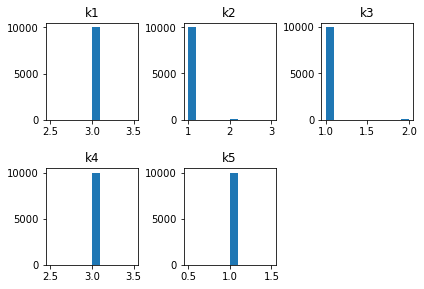

In [204]:
from scipy import stats
from matplotlib.ticker import NullFormatter

plt.subplot(231)
plt.hist(k1[10000:])
plt.title('k1')


plt.subplot(232)
plt.hist(k2[10000:])
plt.title('k2')



plt.subplot(233)
plt.hist(k3[10000:])
plt.title('k3')

plt.subplot(234)
plt.hist(k4[10000:])
plt.title('k4')


plt.subplot(235)
plt.hist(k5[10000:])
plt.title('k5')

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)

plt.show()

In [205]:
pred_den = np.mean(rec_pred_y_den, axis = 6)
pred_den

array([[[[[[ 0.88276098,  0.0406489 ,  0.07659011],
           [ 0.88276098,  0.0406489 ,  0.07659011],
           [ 0.88276098,  0.0406489 ,  0.07659011]],

          [[ 0.38209395,  0.2745917 ,  0.34331435],
           [ 0.38209395,  0.2745917 ,  0.34331435],
           [ 0.38209395,  0.2745917 ,  0.34331435]],

          [[ 0.3653482 ,  0.2610028 ,  0.373649  ],
           [ 0.3653482 ,  0.2610028 ,  0.373649  ],
           [ 0.3653482 ,  0.2610028 ,  0.373649  ]]],


         [[[ 0.88261127,  0.04068498,  0.07670374],
           [ 0.88261127,  0.04068498,  0.07670374],
           [ 0.88261127,  0.04068498,  0.07670374]],

          [[ 0.38209651,  0.27464375,  0.34325974],
           [ 0.38209651,  0.27464375,  0.34325974],
           [ 0.38209651,  0.27464375,  0.34325974]],

          [[ 0.36539596,  0.26103513,  0.37356891],
           [ 0.36539596,  0.26103513,  0.37356891],
           [ 0.36539596,  0.26103513,  0.37356891]]],


         [[[ 0.88255976,  0.04072663,  0.0767136

In [209]:
pred_den[1,0,0,2,1]

array([ 0.32687427,  0.29909546,  0.37403027])

In [218]:
## generate predictive data
pred_data = np.zeros(len(data_all) - len(data))
for i in np.arange(len(data),len(data_all)):
    yt1 = data_all[i-1]
    yt2 = data_all[i-2]
    yt3 = data_all[i-3]
    yt4 = data_all[i-4]
    yt5 = data_all[i-5]
    prob = pred_den[yt1-1, yt2-1, yt3-1, yt4-1, yt5-1]
    pred_data[i - len(data)] = np.random.choice(np.arange(1, C0+1), p = prob)

prob_pred_data = np.zeros((len(data_all) - len(data), C0))    
pred_data_fix = np.append(data[-5:], pred_data)
for i in np.arange(5, len(pred_data_fix)):
        yt1 = pred_data_fix[i-1]
        yt2 = pred_data_fix[i-2]
        yt3 = pred_data_fix[i-3]
        yt4 = pred_data_fix[i-4]
        yt5 = pred_data_fix[i-5]
        prob_pred_data[i-5,:] = pred_y_den[yt1-1, yt2-1, yt3-1, yt4-1, yt5-1]
prob_pred_data

pred_data

/Users/Allain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 1.,  3.,  3.,  3.,  1.,  2.,  1.,  3.,  3.,  1.,  1.,  2.,  1.,
        1.,  2.,  2.,  2.,  1.,  1.,  3.,  3.,  2.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  2.,  3.,  2.,  2.,  2.,  3.,  2.,  3.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  3.,  2.,  3.,  2.,  1.,  2.,  1.,  1.,
        1.,  3.,  1.,  3.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,
        2.,  1.,  1.,  3.,  3.,  1.,  1.,  2.,  1.,  3.,  2.,  3.,  3.,
        3.,  2.,  3.,  3.,  3.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  2.,  3.,  2.,
        1.,  1.,  1.,  3.,  2.,  2.,  3.,  2.,  2.,  1.,  3.,  3.,  1.,
        1.,  3.,  1.,  1.,  2.,  3.,  3.,  2.,  2.,  3.,  2.,  3.,  1.,
        1.,  3.,  1.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,  1.,  1.,  1.,
        3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  2.,  1.,  3.,  3.,
        3.,  1.,  3.,  3.,  2.,  2.,  2.,  3.,  2.,  1.,  2.,  3

array([ 0.00671526,  0.97635037,  0.01693437])

In [191]:
data

array([2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1,
       2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3,
       3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 3], dtype=int8)

In [189]:
pred_data

array([ 1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  2.,
        2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,
        3.,  2.,  1.,  3.,  1.,  3.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,
        1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  3.,  1.,  3.,  1.,  1.,
        3.,  1.,  1.,  3.,  1.,  2.,  3.,  1.,  1.,  3.,  1.,  3.,  3.,
        1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  2.,  3.,  2.,  1.,
        3.,  1.,  1.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  3.,  3.,  1.,  3.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  1.,
        3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  3.,  3.,
        1.,  1.,  3.,  1.,  3.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1

In [104]:
prob_ori_data = np.zeros((len(data_all) - len(data), C0))
ori_com_data = data_all[200:]
ori_com_data = np.append(data[-5:], ori_com_data)
ori_com_data.shape
for i in np.arange(5, len(ori_com_data)):
    if ori_com_data[i-3] == 1:
        prob_ori_data[i-5:,] = np.array((0.99, 0.005, 0.005))
    if ori_com_data[i-3] == 2:
        prob_ori_data[i-5:,] = np.array((0.005, 0.99, 0.005))
    if ori_com_data[i-3] == 3:
        prob_ori_data[i-5:,] = np.array((0.005, 0.005, 0.99))
prob_ori_data

array([[ 0.99 ,  0.005,  0.005],
       [ 0.005,  0.99 ,  0.005],
       [ 0.005,  0.005,  0.99 ],
       ..., 
       [ 0.99 ,  0.005,  0.005],
       [ 0.99 ,  0.005,  0.005],
       [ 0.005,  0.99 ,  0.005]])

In [214]:
prob_ori_data = np.zeros((len(data_all) - len(data), C0))
ori_com_data = data_all[200:]
ori_com_data = np.append(data[-5:], ori_com_data)
for i in np.arange(5, len(ori_com_data)):
    prob_ori_data[i-5:,] = np.array((1/3, 1/3, 1/3))
    if ori_com_data[i-5] == 1 and ori_com_data[i-3] == 1 and ori_com_data[i-1] == 1:
        prob_ori_data[i-5:,] = np.array((0.99, 0.005, 0.005))
    if ori_com_data[i-5] == 2 and ori_com_data[i-3] == 2 and ori_com_data[i-1] == 2:
        prob_ori_data[i-5:,] = np.array((0.005, 0.99, 0.005))
    if ori_com_data[i-5] == 3 and ori_com_data[i-3] == 3 and ori_com_data[i-1] == 3:
        prob_ori_data[i-5:,] = np.array((0.005, 0.005, 0.99))
prob_ori_data

array([[ 0.99 ,  0.005,  0.005],
       [ 0.99 ,  0.005,  0.005],
       [ 0.99 ,  0.005,  0.005],
       ..., 
       [ 0.005,  0.99 ,  0.005],
       [ 0.005,  0.99 ,  0.005],
       [ 0.005,  0.99 ,  0.005]])

In [223]:
### Important lags 4 and 1
prob_ori_data = np.zeros((len(data_all) - len(data), C0))
ori_com_data = data_all[200:]
ori_com_data = np.append(data[-5:], ori_com_data)
for i in np.arange(5, len(ori_com_data)):
    if ori_com_data[i-4] == 1 and ori_com_data[i-1] == 1:
        prob_ori_data[i-5:,] = np.array((0.99, 0.005, 0.005))
    elif ori_com_data[i-4] == 2 and ori_com_data[i-1] == 2:
        prob_ori_data[i-5:,] = np.array((0.005, 0.99, 0.005))
    elif ori_com_data[i-4] == 3 and ori_com_data[i-1] == 3:
        prob_ori_data[i-5:,] = np.array((0.005, 0.005, 0.99))
    else: prob_ori_data[i-5:,] = np.array((1/3, 1/3, 1/3))
prob_ori_data

array([[ 0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333],
       ..., 
       [ 0.005     ,  0.005     ,  0.99      ],
       [ 0.005     ,  0.005     ,  0.99      ],
       [ 0.005     ,  0.005     ,  0.99      ]])

In [224]:
prob_pred_data

array([[ 0.43437864,  0.15847474,  0.40714662],
       [ 0.91276127,  0.02971788,  0.05752085],
       [ 0.15357667,  0.08399088,  0.76243245],
       ..., 
       [ 0.15357667,  0.08399088,  0.76243245],
       [ 0.30831249,  0.01163654,  0.68005097],
       [ 0.32935605,  0.42012109,  0.25052286]])

In [225]:
np.sum(np.absolute(prob_pred_data - prob_ori_data))/(3*500)*100

24.484135043018938

In [194]:
pred_data

array([ 1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  2.,
        2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,
        3.,  2.,  1.,  3.,  1.,  3.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,
        1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  3.,  1.,  3.,  1.,  1.,
        3.,  1.,  1.,  3.,  1.,  2.,  3.,  1.,  1.,  3.,  1.,  3.,  3.,
        1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  2.,  3.,  2.,  1.,
        3.,  1.,  1.,  3.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  3.,  3.,  1.,  3.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  1.,
        3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  3.,  3.,
        1.,  1.,  3.,  1.,  3.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,
        1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1.,  1.,  3.,  1

In [193]:
data_all[200:]

array([2, 1, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1,
       3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2,
       3, 3, 2, 2, 1, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 2, 1, 3, 3,
       1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 1, 1, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 2, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 3, 1, 3,
       3, 3,

In [143]:
i = 200
yt1 = data_all[i-1]
yt2 = data_all[i-2]
yt3 = data_all[i-3]
yt4 = data_all[i-4]
yt5 = data_all[i-5]
prob = pred_y_den[yt1-1, yt2-1, yt3-1, yt4-1, yt5-1]
pred_data[i - len(data)] = np.random.choice(np.arange(1, C0+1), p = prob)
pred_data

array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [148]:
np.arange(len(data),len(data_all)+1)

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38

In [127]:
data_all

array([2, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3,
       1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2,
       3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1,

In [131]:
yt = data_all[199]
yt

2